# Statistiche CoViD-19 in Italia

Popolazione delle regioni d'Italia estratte da: https://www.tuttitalia.it/regioni/popolazione

In [1]:
from datetime import datetime,timedelta
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [2]:
pop = {}
pop['Valle d\'Aosta'] = 0.13
pop['Piemonte'] = 4.3
pop['Lombardia'] = 10
pop['Veneto'] = 4.9
pop['Friuli Venezia Giulia'] = 1.2
#pop['Liguria'] = 1.5
pop['Emilia-Romagna'] = 4.4
pop['Sicilia'] = 5
pop['Campania'] = 5.8
#pop['Marche'] = 1.5
#pop['Calabria'] = 2.0
#pop['Sardegna'] = 1.6
#pop['Puglia'] = 4.0


In [3]:
# This is the Github repo with the Italian detailed data
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv'
df = pd.read_csv(url)
df[df.denominazione_regione == 'Friuli Venezia Giulia'].tail()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3
63928,2021-05-15T17:00:00,ITA,6,Friuli Venezia Giulia,31,Gorizia,GO,45.941498,13.622125,12942,NaN,ITH,ITH4,ITH43
63929,2021-05-15T17:00:00,ITA,6,Friuli Venezia Giulia,32,Trieste,TS,45.649435,13.768136,21039,NaN,ITH,ITH4,ITH44
63930,2021-05-15T17:00:00,ITA,6,Friuli Venezia Giulia,93,Pordenone,PN,45.954435,12.660029,20792,NaN,ITH,ITH4,ITH41
63931,2021-05-15T17:00:00,ITA,6,Friuli Venezia Giulia,885,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,1190,NaN,ITH,ITH4,NaN
63932,2021-05-15T17:00:00,ITA,6,Friuli Venezia Giulia,985,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,NaN,ITH,ITH4,NaN


In [4]:
df.describe()

,codice_regione,codice_provincia,lat,long,totale_casi
count,64041.000000,64041.000000,47829.000000,47829.000000,64041.000000
mean,10.279290,280.149998,42.908522,12.096599,9026.509377
std,5.959087,389.922192,2.631537,2.660574,21819.606593
min,1.000000,1.000000,36.925092,7.320149,0.000000
25%,5.000000,36.000000,40.914047,9.828190,227.000000
50%,9.000000,72.000000,43.715532,12.104734,1509.000000
75%,16.000000,879.000000,45.185093,14.167546,8448.000000
max,22.000000,999.000000,46.499335,18.171897,266675.000000


In [5]:
### Some data manipulation. Refer to https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas

datacolumn = 'totale_casi'
regdf = {}
for r in pop:
    # sum over all provinces for a given date ('data')
    # + rename data -> date, datacolumn -> region name
    regdf[r] = df[df['denominazione_regione'] == r] \
                 .groupby('data')[[datacolumn]].sum() \
                 .reset_index() \
                 .rename(columns={'data': 'date', datacolumn: r})

    # convert date format to days since Jan 1st 2021
    regdf[r]['date'] = regdf[r]['date'].map(lambda d : \
        (datetime.strptime(d, '%Y-%m-%dT%H:%M:%S') - datetime.strptime('2020-12-31','%Y-%m-%d')).days)

    # convert #cases to cases per 1M inhabitants
    regdf[r][r] /= pop[r]

regdf['Emilia-Romagna'].tail()

,date,Emilia-Romagna
442,131,85667.954545
443,132,85782.727273
444,133,85922.727273
445,134,86047.045455
446,135,86165.909091


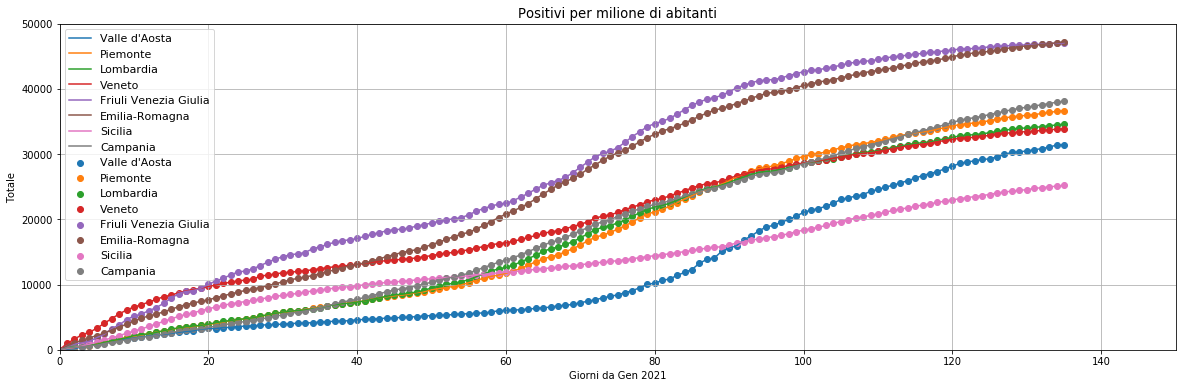

In [13]:
# usare uno di questi due modi: "notebook" rende il plot interattivo, "inline" lo mostra tutto in modo statico
%matplotlib inline
#%matplotlib notebook

plt.subplots(figsize=(20, 6))
plt.grid(which='minor')
for r in pop.keys():
  # get all data points
  t = list(regdf[r].iloc[:, 0]) 
  y = list(regdf[r].iloc[:, 1])
  y0 = y[t.index(0)]
  y[:] = [v - y0 for v in y]
  plt.scatter(t, y, label=r)   # draw the dots
  plt.plot(t, y, label=r)   # draw the lines

plt.rcParams['figure.figsize'] = [20, 10]
plt.rc('font', size=11)
plt.legend()
plt.title("Positivi per milione di abitanti")
plt.xlabel("Giorni da Gen 2021")
plt.ylabel("Totale")
#plt.yscale('log')
plt.ylim((0, 50000))
plt.xlim((0,150))
plt.grid(which='both')
plt.show()
